# Data 606: Bail Bond -Predicting Bail Amounts

## Bail Bond Group 
Tara Bhardvaj 

## Data Cleaning 


In [ ]:
# Import Libraries 
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb

In [ ]:
# Set table view 
pd.set_option('display.max_columns', None)

In [ ]:
# Import .csv
fname = "PretrialReleaseDataExtractWeb.csv"
df_raw = pd.read_csv(fname)
df_raw.shape

(284098, 108)

In [ ]:
# Column names 
print(df_raw.columns.tolist())


['Internal_Case_ID', 'Gender', 'Race', 'Ethnicity', 'Age_at_Crime', 'Age_at_Arrest', 'Court_Name', 'Court_ORI', 'County_Name', 'District', 'Region', 'Court_Type', 'Judge_Name', 'Offense_Date', 'Arrest_Date', 'Arrest_Type', 'Top_Arrest_Law', 'Top_Arrest_Article_Section', 'Top_Arrest_Attempt_Indicator', 'Top_Charge_at_Arrest', 'Top_Charge_Severity_at_Arrest', 'Top_Charge_Weight_at_Arrest', 'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Case_Type', 'First_Arraign_Date', 'Top_Arraign_Law', 'Top_Arraign_Article_Section', 'Top_Arraign_Attempt_Indicator', 'Top_Charge_at_Arraign', 'Top_Severity_at_Arraign', 'Top_Charge_Weight_at_Arraign', 'Top_Charge_at_Arraign_Violent_Felony_Ind', 'Arraign Charge Category', 'Representation_Type', 'App_Count_Arraign_to_Dispo_Released', 'App_Count_Arraign_to_Dispo_Detained', 'App_Count_Arraign_to_Dispo_Total', 'Def_Attended_Sched_Pretrials', 'Remanded_to_Jail_at_Arraign', 'ROR_at_Arraign', 'Bail_Set_and_Posted_at_Arraign', 'Bail_Set_and_Not_Posted_at_Arraign', 'NM

In [ ]:
# Remove extraneous features 
# Features to remove 
remove = ['Court_Name','County_Name', 'District', 'Region', 'Court_Type', 
          'Warrant_Ordered_btw_Arraign_and_Dispo', 'DAT_WO_WS_Prior_to_Arraign', 
          'First_Bench_Warrant_Date', 'Non_Stayed_WO', 'Num_of_Stayed_WO', 'Num_of_ROW',
          'Docket_Status', 'Disposition_Type', 'Disposition_Detail', 'Dismissal_Reason',
          'Disposition_Date', 'Most_Severe_Sentence', 'Top_Conviction_Law', 'Top_Conviction_Article_Section',
          'Top_Conviction_Attempt_Indicator', 'Top_Charge_at_Conviction', 'Top_Charge_Severity_at_Conviction', 
          'Top_Charge_Weight_at_Conviction', 'Top_Charge_at_Conviction_Violent_Felony_Ind',
          'Days_Arraign_Remand_First_Released', 'Known_Days_in_Custody', 'Days_Arraign_Bail_Set_to_First_Posted',
          'Days_Arraign_Bail_Set_to_First_Release', 'Days_Arraign_to_Dispo', 'pend_vfo', 'pend_nonvfo', 'pend_misd', 'supervision',
          'rearrest', 'rearrest_date', 'rearrest_firearm', 'rearrest_date_firearm', 'arr_cycle_id','Partially_Secured_App_Bond_Perc', 'Bail_Made_Indicator',
          'First_Arraign_Date', 'Remanded_to_Jail_at_Arraign', 'ROR_at_Arraign', 'Bail_Set_and_Posted_at_Arraign', 'Bail_Set_and_Not_Posted_at_Arraign', 'NMR_at_Arraign', 
          'Partially_Secured_Surety_Bond_Perc', 'Top_Arrest_Law', 'Top_Arraign_Law', 'Top_Arraign_Article_Section', 'Top_Arraign_Attempt_Indicator', 
          'Top_Charge_at_Arraign', 'Top_Severity_at_Arraign', 'Top_Charge_Weight_at_Arraign', 'Top_Charge_at_Arraign_Violent_Felony_Ind', 
          'Pretrial_Supervision_at_Arraign', 'Contact_Pretrial_Service_Agency', 'Electronic_Monitoring', 'Travel_Restrictions', 'Passport_Surrender', 
          'No_Firearms_or_Weapons', 'Maintain_Employment', 'Maintain_Housing', 'Maintain_School', 'Placement_in_Mandatory_Program', 'Removal_to_Hospital',
          'Obey_Order_of_Protection', 'Obey_Court_Conditions-Family_Offense', 'Other_NMR', 'Order_of_Protection', "Representation_at_Securing_Order",
          'App_Count_Arraign_to_Dispo_Released', 'App_Count_Arraign_to_Dispo_Detained', 'App_Count_Arraign_to_Dispo_Total', 
          'Top_Arrest_Attempt_Indicator','Case_Type']

In [ ]:
df_raw = df_raw.drop(labels=remove, axis=1)


In [ ]:
df_raw1 = pd.DataFrame(df_raw)

In [ ]:
# Drop Nans

df_raw1 = df_raw.dropna(subset=["Internal_Case_ID","Gender","Race","Top_Charge_Severity_at_Arrest"])
df_raw1.isna().sum()

Internal_Case_ID                               0
Gender                                         0
Race                                           0
Ethnicity                                      0
Age_at_Crime                                   0
Age_at_Arrest                                  0
Court_ORI                                      0
Judge_Name                                     0
Offense_Date                                  91
Arrest_Date                                 3018
Arrest_Type                                    0
Top_Arrest_Article_Section                     5
Top_Charge_at_Arrest                           0
Top_Charge_Severity_at_Arrest                  0
Top_Charge_Weight_at_Arrest                    0
Top_Charge_at_Arrest_Violent_Felony_Ind        0
Arraign Charge Category                        0
Representation_Type                        16770
Def_Attended_Sched_Pretrials                   0
Release Decision at Arraign                    0
First_Bail_Set_Cash 

In [ ]:
# replace spaces with /0s
df_raw1.eq(" ").sum()
df_raw1 = df_raw1.replace(" ", 0)
df_raw1.eq(" ").sum()

Internal_Case_ID                           0
Gender                                     0
Race                                       0
Ethnicity                                  0
Age_at_Crime                               0
Age_at_Arrest                              0
Court_ORI                                  0
Judge_Name                                 0
Offense_Date                               0
Arrest_Date                                0
Arrest_Type                                0
Top_Arrest_Article_Section                 0
Top_Charge_at_Arrest                       0
Top_Charge_Severity_at_Arrest              0
Top_Charge_Weight_at_Arrest                0
Top_Charge_at_Arrest_Violent_Felony_Ind    0
Arraign Charge Category                    0
Representation_Type                        0
Def_Attended_Sched_Pretrials               0
Release Decision at Arraign                0
First_Bail_Set_Cash                        0
First_Bail_Set_Credit                      0
First_Insu

In [ ]:
#create Bail_amount Column

amt_cols = ['First_Bail_Set_Cash',
       'First_Bail_Set_Credit', 'First_Insurance_Company_Bail_Bond',
       'First_Secured_Surety_Bond', 'First_Secured_App_Bond',
       'First_Unsecured_Surety_Bond', 'First_Unsecured_App_Bond',
       'First_Partially_Secured_Surety_Bond',
       'First_Partially_Secured_App_Bond']

In [ ]:
for c in amt_cols: 
    s = df_raw1[c].str.strip()
    df_raw1[c] = pd.to_numeric(s)


In [ ]:
for c in amt_cols: 
    df_raw1[c].fillna(value=0, inplace=True)

In [ ]:
df_raw1["Bail_Amount"] = df_raw1[amt_cols].max(axis=1)

In [ ]:
df_raw1 = df_raw1.drop(amt_cols, axis=1)

In [ ]:
# create Age column
df_raw1["Age"] = df_raw1[["Age_at_Crime", "Age_at_Arrest"]].max(axis=1)

In [ ]:
#Boolean Gender 
# drop "unknown" gender
gender_filter = (df_raw1["Gender"]!="Unknown")
df_raw1 = df_raw1[gender_filter]

df_raw1["Gender"] = np.where(df_raw1["Gender"] == "male", 0, 1)


In [ ]:
# Boolean for is this a violent felony
df_raw1["Violent_Fel"] = np.where(df_raw1["Top_Charge_at_Arrest_Violent_Felony_Ind"] == "N", 0, 1)

In [ ]:
# Drop Internal ID 
df_raw1 = df_raw1.drop(["Internal_Case_ID"],axis=1)

In [ ]:
# Bail Filter ( Only want to include cases where bail was assigned)
bail_filter = (df_raw1["Release Decision at Arraign"] == "Bail-set")
df_raw1 = df_raw1[bail_filter]

In [ ]:
# Select years between 2018-2021
df_raw1["Arrest_Date"] = pd.to_datetime(df_raw1["Arrest_Date"], format='%m/%d/%Y')
df_raw1["Offense_Date"] = pd.to_datetime(df_raw1["Arrest_Date"], format='%m/%d/%Y')

df_raw1["Arrest_Date"] = pd.DatetimeIndex(df_raw1["Arrest_Date"]).year
df_raw1["Offense_Date"] = pd.DatetimeIndex(df_raw1["Offense_Date"]).year


In [ ]:
date_cols = ["Arrest_Date","Offense_Date"]

In [ ]:
df_raw1["Year"] = df_raw1[date_cols].max(axis=1)

In [ ]:
df_raw1 = df_raw1.dropna()

In [ ]:
year_filter = (df_raw1["Year"]>=2018)
df_raw1 = df_raw1[year_filter]



In [ ]:
df_raw1 = df_raw1.drop(["Arrest_Date","Offense_Date"],axis=1)


In [ ]:
#put Hispanic 
df_raw1['Race'] = np.where(df_raw1['Ethnicity'] == "Hispanic", "Hispanic", df_raw1['Race'])
df_raw1 = df_raw1.drop('Ethnicity', axis=1)

In [ ]:
df_clean = pd.DataFrame(df_raw1)

In [ ]:
# df_clean.to_csv("606_bail_columns_modelfeeder.csv")

## Descriptive Statistics

In [ ]:
import seaborn as sns

In [ ]:
df_clean.columns

Index(['Gender', 'Race', 'Age_at_Crime', 'Age_at_Arrest', 'Court_ORI',
       'Judge_Name', 'Arrest_Type', 'Top_Arrest_Article_Section',
       'Top_Charge_at_Arrest', 'Top_Charge_Severity_at_Arrest',
       'Top_Charge_Weight_at_Arrest',
       'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Arraign Charge Category',
       'Representation_Type', 'Def_Attended_Sched_Pretrials',
       'Release Decision at Arraign', 'prior_vfo_cnt', 'prior_nonvfo_cnt',
       'prior_misd_cnt', 'Bail_Amount', 'Age', 'Violent_Fel', 'Year'],
      dtype='object')

<AxesSubplot:title={'center':'Bail_Amount'}, xlabel='[Arraign Charge Category]'>

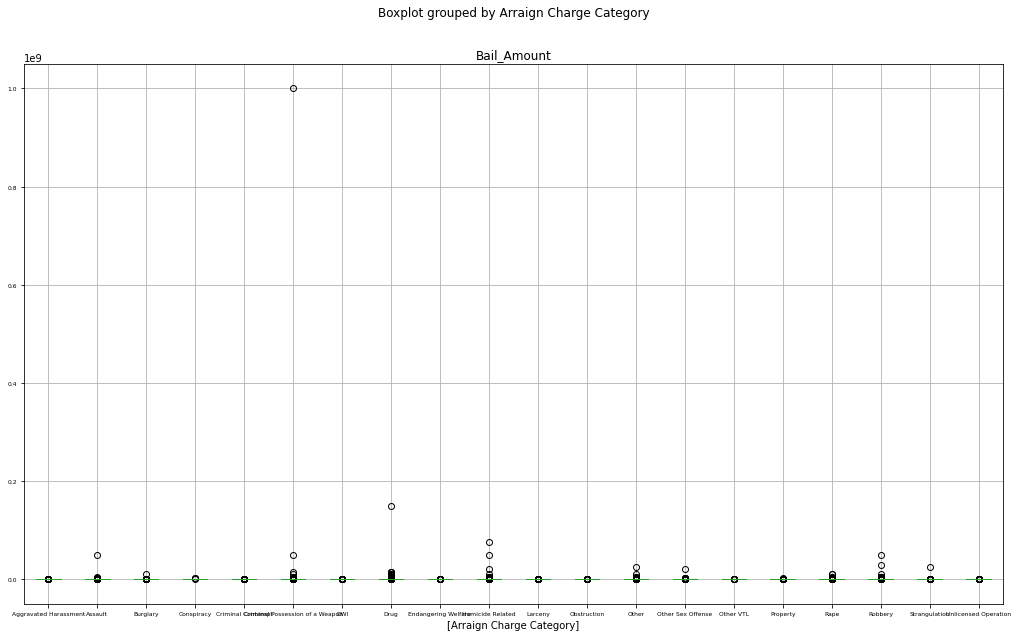

In [ ]:
df_clean.boxplot(column=["Bail_Amount"], by=["Arraign Charge Category"], fontsize=6, figsize=(17,10))

<AxesSubplot:xlabel='Bail_Amount', ylabel='Arraign Charge Category'>

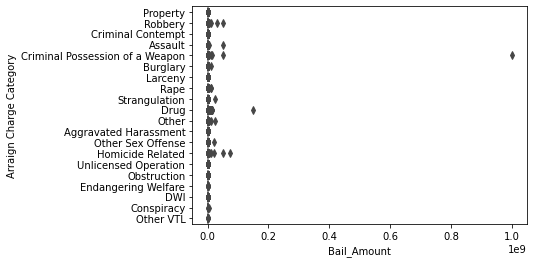

In [ ]:
sns.boxplot(x=df_clean["Bail_Amount"], y=df_clean["Arraign Charge Category"])

In [ ]:
df_crime_bail = df_clean[["Bail_Amount","Arraign Charge Category"]]


In [ ]:
df_crime_bail.groupby(["Arraign Charge Category"]).agg(["count","min","median","max","mean","std"])

Bail_Amount                                 \
                                      count     min    median          max   
Arraign Charge Category                                                      
Aggravated Harassment                   764     1.0    7500.0     600000.0   
Assault                                6492     1.0   10000.0   50000000.0   
Burglary                               3171     1.0   10000.0   10000000.0   
Conspiracy                               21     1.0      10.0    3500000.0   
Criminal Contempt                      5151     1.0   10000.0    1000000.0   
Criminal Possession of a Weapon        5162     1.0   30000.0  999999999.0   
DWI                                     133     1.0       1.0     300000.0   
Drug                                   2923     1.0      25.0  150000000.0   
Endangering Welfare                     147     1.0    1000.0     150000.0   
Homicide Related                        460  5000.0  150000.0   75000000.0   
Larceny                                2438     1.0       1.0     600000.0   
Obstruction                             224     1.0       1.0     300000.0   
Other                                  1163     1.0      10.0   25001500.0   
Other Sex Offense                       919     1.0   30000.0   20000000.0   
Other VTL                                36     1.0       1.0    1250000.0   
Property                               1962     1.0      25.0    2000000.0   
Rape                                    491     1.0   70000.0   10000000.0   
Robbery                                3139     1.0   25000.0   50000000.0   
Strangulation                           899     1.0   10000.0   25001000.0   
Unlicensed Operation                    188     1.0       1.0     100000.0   

                                                              
                                          mean           std  
Arraign Charge Category                                       
Aggravated Harassment             21688.638743  5.068199e+04  
Assault                           60373.557147  6.385186e+05  
Burglary                          48453.391359  2.088761e+05  
Conspiracy                       470003.000000  9.297457e+05  
Criminal Contempt                 20122.588624  4.254959e+04  
Criminal Possession of a Weapon  284999.372143  1.393790e+07  
DWI                               12450.857143  3.545400e+04  
Drug                             202921.998289  2.901245e+06  
Endangering Welfare                8278.938776  1.836751e+04  
Homicide Related                 690217.391304  4.351727e+06  
Larceny                            7377.490156  3.016788e+04  
Obstruction                        3403.254464  2.189680e+04  
Other                             76041.930353  8.442014e+05  
Other Sex Offense                137110.247008  6.979317e+05  
Other VTL                         76002.194444  2.448106e+05  
Property                          17954.065240  7.729542e+04  
Rape                             245752.549898  7.878982e+05  
Robbery                          110516.609430  1.085115e+06  
Strangulation                     53695.909900  8.352589e+05  
Unlicensed Operation               7666.845745  1.761185e+04

In [ ]:
df_clean.describe()

,Gender,Age_at_Crime,Age_at_Arrest,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Violent_Fel,Year
count,35883.0,35883.000000,35883.000000,35883.000000,35883.000000,35883.000000,3.588300e+04,35883.000000,35883.000000,35883.000000
mean,1.0,33.937686,34.071928,0.360979,0.718780,2.803918,1.072598e+05,34.073433,0.447817,2020.345289
std,0.0,10.895098,10.921314,0.614587,1.120732,3.448525,5.396852e+06,10.918734,0.497276,0.488764
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,2018.000000
25%,1.0,26.000000,26.000000,0.000000,0.000000,0.000000,1.000000e+02,26.000000,0.000000,2020.000000
50%,1.0,32.000000,32.000000,0.000000,0.000000,1.000000,1.000000e+04,32.000000,0.000000,2020.000000
75%,1.0,40.000000,40.000000,1.000000,1.000000,5.000000,4.000000e+04,40.000000,1.000000,2021.000000
max,1.0,87.000000,88.000000,2.000000,4.000000,10.000000,1.000000e+09,88.000000,1.000000,2021.000000


In [ ]:
df_clean.groupby(['Race']).mean()

,Gender,Age_at_Crime,Age_at_Arrest,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Violent_Fel,Year
Race,,,,,,,,,,
American Indian/Alaskan Native,1.0,29.444444,29.518519,0.185185,0.555556,2.481481,11189.296296,29.518519,0.444444,2020.518519
Asian/Pacific Islander,1.0,29.428571,29.500000,0.107143,0.071429,1.250000,34170.678571,29.500000,0.178571,2020.464286
Black,1.0,33.402697,33.506451,0.457495,0.771943,2.888175,118733.787872,33.507354,0.501301,2020.347050
Hispanic,1.0,33.560498,33.747289,0.320232,0.692090,2.540414,130467.547191,33.747289,0.492730,2020.350789
Other,1.0,32.323529,34.441176,0.000000,0.294118,1.882353,55017.941176,34.441176,0.294118,2020.382353
Unknown,1.0,34.118114,34.378151,0.246032,0.633520,2.567227,75081.702148,34.378151,0.316060,2020.330065
White,1.0,35.884977,35.991496,0.179472,0.634492,2.974340,58162.385797,35.997016,0.287185,2020.337162


In [ ]:
df_clean.groupby(['Violent_Fel']).mean()


,Gender,Age_at_Crime,Age_at_Arrest,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Year
Violent_Fel,,,,,,,,,
0,1,35.535732,35.642324,0.370597,0.867367,3.397749,50115.637428,35.645049,2020.344403
1,1,31.967204,32.135540,0.349119,0.535565,2.071691,177721.935279,32.135540,2020.346381


In [ ]:
df_clean.groupby(['Violent_Fel']).median()

,Gender,Age_at_Crime,Age_at_Arrest,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Year
Violent_Fel,,,,,,,,,
0,1,34.0,34.0,0.0,0.0,2.0,2000.0,34.0,2020.0
1,1,29.0,30.0,0.0,0.0,1.0,30000.0,30.0,2020.0


In [ ]:
df_clean["Top_Charge_Severity_at_Arrest"].value_counts()

Felony         24904
Misdemeanor    10945
Infraction        23
Violation         11
Name: Top_Charge_Severity_at_Arrest, dtype: int64

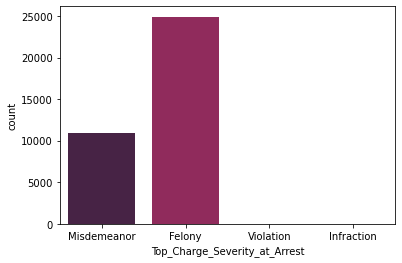

In [ ]:

ax = sns.countplot(x="Top_Charge_Severity_at_Arrest",
                   data=df_clean,palette="rocket")

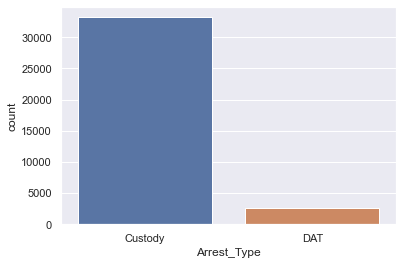

In [ ]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Arrest_Type", data=df_clean)

In [ ]:
df_clean["Race"].value_counts()

Black                             18833
Hispanic                           8116
White                              6703
Unknown                            2142
Other                                34
Asian/Pacific Islander               28
American Indian/Alaskan Native       27
Name: Race, dtype: int64

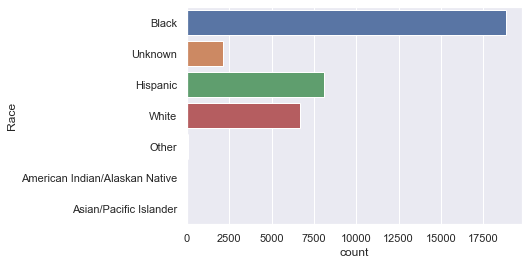

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Race", data=df_clean)

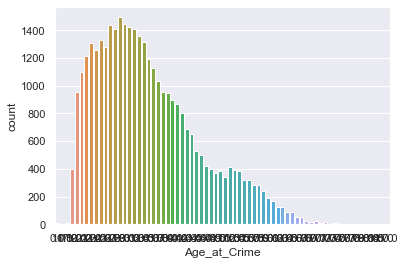

In [ ]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Age_at_Crime", data=df_clean)

In [ ]:
std_val = df_clean["Bail_Amount"].std()
mean_val = df_clean["Bail_Amount"].mean()

two_plus = (2*std_val) +mean_val
two_minus = mean_val- (2*std_val)


In [ ]:
plus_outlier_filter = (df_clean["Bail_Amount"]<=two_plus)
minus_outlier_filter = (df_clean["Bail_Amount"]>=two_minus)

df_clean = df_clean[plus_outlier_filter]
df_clean = df_clean[minus_outlier_filter]

<ipython-input-46-fb1fe8fdab9f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[minus_outlier_filter]


In [ ]:
df_clean.agg(["max", "min","median"])

,Gender,Race,Age_at_Crime,Age_at_Arrest,Court_ORI,Judge_Name,Arrest_Type,Top_Arrest_Article_Section,Top_Charge_at_Arrest,Top_Charge_Severity_at_Arrest,Top_Charge_Weight_at_Arrest,Top_Charge_at_Arrest_Violent_Felony_Ind,Arraign Charge Category,Representation_Type,Def_Attended_Sched_Pretrials,Release Decision at Arraign,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Bail_Amount,Age,Violent_Fel,Year
max,1.0,White,87.0,87.0,NY062033J,"Zuckerman, David S.",DAT,600,VTL 1229-C 03 I Seat Belt Violation-Driver,Violation,V,Y,Unlicensed Operation,Self Represented,NaN,Bail-set,2.0,4.0,10.0,10000000.0,87.0,1.0,2021.0
min,1.0,American Indian/Alaskan Native,0.0,0.0,NY001011J,"Abriano, Gerianne",Custody,0168-F,AC 10-131 (I)(3) UM Possession of Ammunition,Felony,AF,N,Aggravated Harassment,18B (Assigned Counsel),NaN,Bail-set,0.0,0.0,0.0,1.0,0.0,0.0,2018.0
median,1.0,NaN,32.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,10000.0,32.0,0.0,2020.0


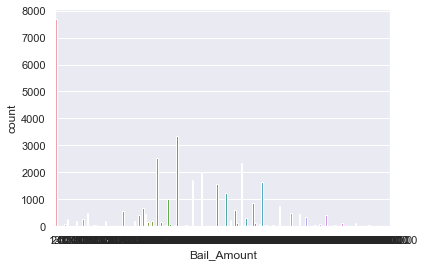

In [ ]:
ax = sns.countplot(x="Bail_Amount", data=df_clean)

## Model Preprocessing

In [ ]:
# Top_Arrest_Article_Section Dummies
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Top_Charge_at_Arrest'], prefix='law')],axis=1).drop(['Top_Arrest_Article_Section'],axis=1)


In [ ]:
# Race Dummies
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Race'], prefix='Race')],axis=1).drop(['Race'],axis=1)


In [ ]:
#Charge Type Dummies
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Arraign Charge Category'], prefix='Charge')],axis=1).drop(['Arraign Charge Category'],axis=1)

In [ ]:
# Charge Severity Dummies 
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Top_Charge_Severity_at_Arrest'], prefix='Severity')],axis=1).drop(['Top_Charge_Severity_at_Arrest'],axis=1)

In [ ]:
# Court ORI Dummies 
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Court_ORI'], prefix='Court')],axis=1).drop(['Court_ORI'],axis=1)

In [ ]:

df_raw1["Top_Charge_at_Arrest"].value_counts()

df_raw1.dtypes

Gender                                       int32
Race                                        object
Age_at_Crime                               float64
Age_at_Arrest                              float64
Court_ORI                                   object
Judge_Name                                  object
Arrest_Type                                 object
Top_Arrest_Article_Section                  object
Top_Charge_at_Arrest                        object
Top_Charge_Severity_at_Arrest               object
Top_Charge_Weight_at_Arrest                 object
Top_Charge_at_Arrest_Violent_Felony_Ind     object
Arraign Charge Category                     object
Representation_Type                         object
Def_Attended_Sched_Pretrials                object
Release Decision at Arraign                 object
prior_vfo_cnt                              float64
prior_nonvfo_cnt                           float64
prior_misd_cnt                             float64
Bail_Amount                    

In [ ]:
df_clean.shape

(35866, 768)

In [ ]:

df_clean.columns


Index(['Gender', 'Age_at_Crime', 'Age_at_Arrest', 'Judge_Name', 'Arrest_Type',
       'Top_Charge_at_Arrest', 'Top_Charge_Weight_at_Arrest',
       'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Representation_Type',
       'Def_Attended_Sched_Pretrials',
       ...
       'Court_NY054011J', 'Court_NY055011J', 'Court_NY056011J',
       'Court_NY059011J', 'Court_NY059021J', 'Court_NY059031J',
       'Court_NY059041J', 'Court_NY059051J', 'Court_NY059691J',
       'Court_NY062033J'],
      dtype='object', length=768)

In [ ]:
#remove additional features for this model (Sparse points)
xtra_features =['Age_at_Crime', 'Age_at_Arrest',
       'Judge_Name', 'Arrest_Type', 'Top_Charge_at_Arrest_Violent_Felony_Ind',
       'Representation_Type',"Top_Charge_at_Arrest", "Top_Charge_Weight_at_Arrest",
       'Release Decision at Arraign','Year']

In [ ]:
df_model_feeder = pd.DataFrame(df_clean.drop(xtra_features, axis=1))

In [ ]:
df_model_feeder.head()

NameError: name 'df_model_feeder' is not defined

In [ ]:
# Change bail amount to quantile to predict quantile bail 

df_model_feeder["Bail_Pct"] = df_model_feeder["Bail_Amount"].rank(pct=True)


In [ ]:
import matplotlib as plt

                                         Bail Percentile vs. Bail Amount


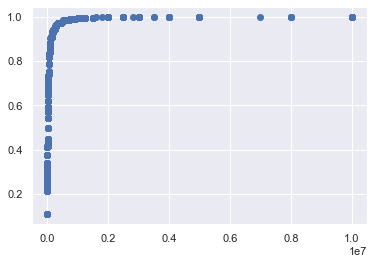

In [ ]:
plt.pyplot.scatter(x=df_model_feeder["Bail_Amount"], y= df_model_feeder["Bail_Pct"])
print("                                         Bail Percentile vs. Bail Amount")  

In [ ]:
df_model_feeder = df_model_feeder.drop(["Bail_Amount"],axis=1)


In [ ]:
df_model_feeder["Def_Attended_Sched_Pretrials"] = df_model_feeder["Def_Attended_Sched_Pretrials"].apply(pd.to_numeric)

In [ ]:
df_model_feeder.head()

,Gender,Def_Attended_Sched_Pretrials,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Age,Violent_Fel,law_AC 10-131 (I)(3) UM Possession of Ammunition,law_AC 10-131 (a) UM FIREARMS: KEEP/CARRY; NO LICENSE/PERMIT,law_AC 10-131 (b) V SALE OR POSSESSION OF AIR PISTOLS/RIFLES,"law_AC 10-131 (g) UM PISTOL TOY/IMITATOR, UNLAWFUL SALE, USE, ETC.",law_AC 10-131 I3 UM Possession of Pistol Ammunition,law_AM 353-A 01 EF Aggravated Cruelty To Animals,law_COR 0168-F 02-B3 EF Lev 1-2 Sex Offendr-Photo Viol,law_COR 0168-F 02A DF Sex Off Fail Verify-Prior Off,law_COR 0168-F 02B1 EF Sex Off Fail Verify-1st Offens,law_COR 0168-F 03 DF Lev 3/Sex Pred-Ver 90d-Prior,law_COR 0168-F 03 EF Lev 3/Sex Pred-Ver 90d-1st Off,law_COR 0168-F 04 DF Sex Off Fail Rep Change-Prior,law_COR 0168-F 04 EF Sex Off Fail Rep Change-1st Of,law_COR 0168-F DF Sor Registry Viol-Prior Offens,law_COR 0168-F EF Sor Registry Viol- 1st Offense,law_COR 0168-T DF Fail To Regis:Sex Ofnd 2nd Off,law_COR 0168-T DF Sex Offender Reg Viol-2nd Off,law_COR 0168-T EF Sex Offender Reg Viol-1st Off,law_PHL 3383 02 AM Imit Control Subs-1st Viol,law_PL 100.10 DF Criminal Solicitation -2nd,law_PL 105.05 01 AM Conspiracy -5th,law_PL 105.10 01 EF Conspiracy -4th,law_PL 105.15 BF Conspiracy -2nd,law_PL 110-120.00 01 BM Aslt 3-W/Int Cause Phys Injury,law_PL 110-120.00 01H AM Hate Cr/Assault 3-Cause Injury,law_PL 110-120.00 BM Assault-3rd,law_PL 110-120.05 01 EF Aslt W Int Caus Serious Ph Inj,law_PL 110-120.05 02 EF Aslt W/Int Cause Ph Inj W/Weap,law_PL 110-120.05 02H DF Hate Crime/Aslt Inj Weapon,law_PL 110-120.05 03 EF Assault In The Second Degree,law_PL 110-120.05 03A EF Aslt-2-Caus Inj To Soc Svc Emp,law_PL 110-120.06 DF Gang Assault 2nd Degree,law_PL 110-120.07 CF Gang Assault 1st Degree,law_PL 110-120.08 DF Aslt:Police Off/Fireman/Emt,law_PL 110-120.10 01 CF Aslt W/Int Caus Ser Inj W/Weap,law_PL 110-120.10 02 CF Aslt:W/Int Caus Disfig/Dismemb,law_PL 110-120.11 CF Agg Aslt Police Offr Dead Weap,law_PL 110-120.18 EF Menacing Police/Peace Officer,law_PL 110-120.25 EF Reckless Endangerment-1st,law_PL 110-121.11 A BM Crim Obstruc Breath/Aply Press,law_PL 110-125.25 01 BF Murder: Intention,law_PL 110-125.25 01H BF Hate Crime/Murder-2:Intent,law_PL 110-125.25 02 BF Murder:Depraved Indifference,law_PL 110-125.25 03 BF Murder-2: During Specified Fel,law_PL 110-125.25 04 BF Murder-2:Deprav-Kill Person<11,law_PL 110-125.25 BF Murder-2nd Deg,law_PL 110-125.26 1AI AF Aggrav Murder- Police Officer,law_PL 110-125.27 1AI AF Murder-1st:Police Officer,law_PL 110-130.25 02 AM Rape 3: Vict Lt 17 Perp Gt 21,law_PL 110-130.25 03 AM Rape3:No Cnsnt-Victm Not Incap,law_PL 110-130.35 01 CF Rape-1st:Forcible Compulsion,law_PL 110-130.35 02 CF Rape:Intrcrse Fe Phys Helpless,law_PL 110-130.35 04 CF Rape-1st:Actor >17 Victim <13,law_PL 110-130.35 CF Rape-1st,law_PL 110-130.45 01 EF Criminal Sex Act-2: Victim<15,law_PL 110-130.50 01 CF Crim Sex Act-1st:By Force,law_PL 110-130.50 02 CF Crim Sex Act 1:Victim Helpless,law_PL 110-130.50 03 CF Criminal Sex Act-1: Victim<11,law_PL 110-130.65 01 EF Sx Abuse 1st:Forcible Compulsn,law_PL 110-130.65 04 EF Sex Abuse 1:Vic Undr 13/Def 21,law_PL 110-135.20 CF Kidnapping 2nd,law_PL 110-135.61 AM Coercion-2nd Degree,law_PL 110-140.10 0A BM Crim Trespass 3rd:Enclsd Prop,law_PL 110-140.20 EF Burg-3:Illeg Entry With Intent,law_PL 110-140.25 01 DF Burg:Ill Entry W/Cri Int,law_PL 110-140.25 01B DF Burg:Causes Physical Injury,law_PL 110-140.25 01C DF Burg:Uses Dangerous Instrument,law_PL 110-140.25 02 DF Burglary 2nd- Dwelling,law_PL 110-140.25 02T CF Pl490.25/Crm Terorsm: Burg 2,law_PL 110-140.25 DF Burglary-2nd,law_PL 110-140.30 02 CF Burg:Dwelling Causing Injury,law_PL 110-140.30 03 CF Burg-1st: Dangerous Instrument,law_PL 110-140.30 04 CF Burglary 1st: Displays Firearm,law_PL 110-140.30 CF Burglary-1st,law_PL 110-145.05 02 AM Crim Mischief 3:Property> $250,law_PL 110-150.10 DF Arson-3rd:Intentionally Damage,law_PL 110-150.15 CF Arson-2nd:Intent Person Presnt,law_PL 110-155.25 BM Petit Larcen

# Model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#list of columns
cols_to_scale = ['Age','Def_Attended_Sched_Pretrials',"prior_vfo_cnt",
                 "prior_nonvfo_cnt", "prior_misd_cnt"]


scaler = StandardScaler()
scaler.fit(df_model_feeder[cols_to_scale])

#scale  data
df_model_feeder[cols_to_scale] = scaler.transform(df_model_feeder[cols_to_scale])


In [ ]:
df_model_feeder.head(2)

,Gender,Def_Attended_Sched_Pretrials,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,Age,Violent_Fel,law_AC 10-131 (I)(3) UM Possession of Ammunition,law_AC 10-131 (a) UM FIREARMS: KEEP/CARRY; NO LICENSE/PERMIT,law_AC 10-131 (b) V SALE OR POSSESSION OF AIR PISTOLS/RIFLES,"law_AC 10-131 (g) UM PISTOL TOY/IMITATOR, UNLAWFUL SALE, USE, ETC.",law_AC 10-131 I3 UM Possession of Pistol Ammunition,law_AM 353-A 01 EF Aggravated Cruelty To Animals,law_COR 0168-F 02-B3 EF Lev 1-2 Sex Offendr-Photo Viol,law_COR 0168-F 02A DF Sex Off Fail Verify-Prior Off,law_COR 0168-F 02B1 EF Sex Off Fail Verify-1st Offens,law_COR 0168-F 03 DF Lev 3/Sex Pred-Ver 90d-Prior,law_COR 0168-F 03 EF Lev 3/Sex Pred-Ver 90d-1st Off,law_COR 0168-F 04 DF Sex Off Fail Rep Change-Prior,law_COR 0168-F 04 EF Sex Off Fail Rep Change-1st Of,law_COR 0168-F DF Sor Registry Viol-Prior Offens,law_COR 0168-F EF Sor Registry Viol- 1st Offense,law_COR 0168-T DF Fail To Regis:Sex Ofnd 2nd Off,law_COR 0168-T DF Sex Offender Reg Viol-2nd Off,law_COR 0168-T EF Sex Offender Reg Viol-1st Off,law_PHL 3383 02 AM Imit Control Subs-1st Viol,law_PL 100.10 DF Criminal Solicitation -2nd,law_PL 105.05 01 AM Conspiracy -5th,law_PL 105.10 01 EF Conspiracy -4th,law_PL 105.15 BF Conspiracy -2nd,law_PL 110-120.00 01 BM Aslt 3-W/Int Cause Phys Injury,law_PL 110-120.00 01H AM Hate Cr/Assault 3-Cause Injury,law_PL 110-120.00 BM Assault-3rd,law_PL 110-120.05 01 EF Aslt W Int Caus Serious Ph Inj,law_PL 110-120.05 02 EF Aslt W/Int Cause Ph Inj W/Weap,law_PL 110-120.05 02H DF Hate Crime/Aslt Inj Weapon,law_PL 110-120.05 03 EF Assault In The Second Degree,law_PL 110-120.05 03A EF Aslt-2-Caus Inj To Soc Svc Emp,law_PL 110-120.06 DF Gang Assault 2nd Degree,law_PL 110-120.07 CF Gang Assault 1st Degree,law_PL 110-120.08 DF Aslt:Police Off/Fireman/Emt,law_PL 110-120.10 01 CF Aslt W/Int Caus Ser Inj W/Weap,law_PL 110-120.10 02 CF Aslt:W/Int Caus Disfig/Dismemb,law_PL 110-120.11 CF Agg Aslt Police Offr Dead Weap,law_PL 110-120.18 EF Menacing Police/Peace Officer,law_PL 110-120.25 EF Reckless Endangerment-1st,law_PL 110-121.11 A BM Crim Obstruc Breath/Aply Press,law_PL 110-125.25 01 BF Murder: Intention,law_PL 110-125.25 01H BF Hate Crime/Murder-2:Intent,law_PL 110-125.25 02 BF Murder:Depraved Indifference,law_PL 110-125.25 03 BF Murder-2: During Specified Fel,law_PL 110-125.25 04 BF Murder-2:Deprav-Kill Person<11,law_PL 110-125.25 BF Murder-2nd Deg,law_PL 110-125.26 1AI AF Aggrav Murder- Police Officer,law_PL 110-125.27 1AI AF Murder-1st:Police Officer,law_PL 110-130.25 02 AM Rape 3: Vict Lt 17 Perp Gt 21,law_PL 110-130.25 03 AM Rape3:No Cnsnt-Victm Not Incap,law_PL 110-130.35 01 CF Rape-1st:Forcible Compulsion,law_PL 110-130.35 02 CF Rape:Intrcrse Fe Phys Helpless,law_PL 110-130.35 04 CF Rape-1st:Actor >17 Victim <13,law_PL 110-130.35 CF Rape-1st,law_PL 110-130.45 01 EF Criminal Sex Act-2: Victim<15,law_PL 110-130.50 01 CF Crim Sex Act-1st:By Force,law_PL 110-130.50 02 CF Crim Sex Act 1:Victim Helpless,law_PL 110-130.50 03 CF Criminal Sex Act-1: Victim<11,law_PL 110-130.65 01 EF Sx Abuse 1st:Forcible Compulsn,law_PL 110-130.65 04 EF Sex Abuse 1:Vic Undr 13/Def 21,law_PL 110-135.20 CF Kidnapping 2nd,law_PL 110-135.61 AM Coercion-2nd Degree,law_PL 110-140.10 0A BM Crim Trespass 3rd:Enclsd Prop,law_PL 110-140.20 EF Burg-3:Illeg Entry With Intent,law_PL 110-140.25 01 DF Burg:Ill Entry W/Cri Int,law_PL 110-140.25 01B DF Burg:Causes Physical Injury,law_PL 110-140.25 01C DF Burg:Uses Dangerous Instrument,law_PL 110-140.25 02 DF Burglary 2nd- Dwelling,law_PL 110-140.25 02T CF Pl490.25/Crm Terorsm: Burg 2,law_PL 110-140.25 DF Burglary-2nd,law_PL 110-140.30 02 CF Burg:Dwelling Causing Injury,law_PL 110-140.30 03 CF Burg-1st: Dangerous Instrument,law_PL 110-140.30 04 CF Burglary 1st: Displays Firearm,law_PL 110-140.30 CF Burglary-1st,law_PL 110-145.05 02 AM Crim Mischief 3:Property> $250,law_PL 110-150.10 DF Arson-3rd:Intentionally Damage,law_PL 110-150.15 CF Arson-2nd:Intent Person Presnt,law_PL 110-155.25 BM Petit Larcen

In [ ]:
X = df_model_feeder.drop(["Bail_Pct"],axis=1)
y = df_model_feeder["Bail_Pct"]


In [ ]:
#Test_Train Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
df_model_feeder_2 = df_model_feeder.drop(labels=["Def_Attended_Sched_Pretrials",
                                                 "prior_vfo_cnt", "prior_nonvfo_cnt", 
                                                "prior_misd_cnt", "Age"], axis=1)

In [ ]:
df_model_feeder_2.head()

,Gender,Violent_Fel,law_AC 10-131 (I)(3) UM Possession of Ammunition,law_AC 10-131 (a) UM FIREARMS: KEEP/CARRY; NO LICENSE/PERMIT,law_AC 10-131 (b) V SALE OR POSSESSION OF AIR PISTOLS/RIFLES,"law_AC 10-131 (g) UM PISTOL TOY/IMITATOR, UNLAWFUL SALE, USE, ETC.",law_AC 10-131 I3 UM Possession of Pistol Ammunition,law_AM 353-A 01 EF Aggravated Cruelty To Animals,law_COR 0168-F 02-B3 EF Lev 1-2 Sex Offendr-Photo Viol,law_COR 0168-F 02A DF Sex Off Fail Verify-Prior Off,law_COR 0168-F 02B1 EF Sex Off Fail Verify-1st Offens,law_COR 0168-F 03 DF Lev 3/Sex Pred-Ver 90d-Prior,law_COR 0168-F 03 EF Lev 3/Sex Pred-Ver 90d-1st Off,law_COR 0168-F 04 DF Sex Off Fail Rep Change-Prior,law_COR 0168-F 04 EF Sex Off Fail Rep Change-1st Of,law_COR 0168-F DF Sor Registry Viol-Prior Offens,law_COR 0168-F EF Sor Registry Viol- 1st Offense,law_COR 0168-T DF Fail To Regis:Sex Ofnd 2nd Off,law_COR 0168-T DF Sex Offender Reg Viol-2nd Off,law_COR 0168-T EF Sex Offender Reg Viol-1st Off,law_PHL 3383 02 AM Imit Control Subs-1st Viol,law_PL 100.10 DF Criminal Solicitation -2nd,law_PL 105.05 01 AM Conspiracy -5th,law_PL 105.10 01 EF Conspiracy -4th,law_PL 105.15 BF Conspiracy -2nd,law_PL 110-120.00 01 BM Aslt 3-W/Int Cause Phys Injury,law_PL 110-120.00 01H AM Hate Cr/Assault 3-Cause Injury,law_PL 110-120.00 BM Assault-3rd,law_PL 110-120.05 01 EF Aslt W Int Caus Serious Ph Inj,law_PL 110-120.05 02 EF Aslt W/Int Cause Ph Inj W/Weap,law_PL 110-120.05 02H DF Hate Crime/Aslt Inj Weapon,law_PL 110-120.05 03 EF Assault In The Second Degree,law_PL 110-120.05 03A EF Aslt-2-Caus Inj To Soc Svc Emp,law_PL 110-120.06 DF Gang Assault 2nd Degree,law_PL 110-120.07 CF Gang Assault 1st Degree,law_PL 110-120.08 DF Aslt:Police Off/Fireman/Emt,law_PL 110-120.10 01 CF Aslt W/Int Caus Ser Inj W/Weap,law_PL 110-120.10 02 CF Aslt:W/Int Caus Disfig/Dismemb,law_PL 110-120.11 CF Agg Aslt Police Offr Dead Weap,law_PL 110-120.18 EF Menacing Police/Peace Officer,law_PL 110-120.25 EF Reckless Endangerment-1st,law_PL 110-121.11 A BM Crim Obstruc Breath/Aply Press,law_PL 110-125.25 01 BF Murder: Intention,law_PL 110-125.25 01H BF Hate Crime/Murder-2:Intent,law_PL 110-125.25 02 BF Murder:Depraved Indifference,law_PL 110-125.25 03 BF Murder-2: During Specified Fel,law_PL 110-125.25 04 BF Murder-2:Deprav-Kill Person<11,law_PL 110-125.25 BF Murder-2nd Deg,law_PL 110-125.26 1AI AF Aggrav Murder- Police Officer,law_PL 110-125.27 1AI AF Murder-1st:Police Officer,law_PL 110-130.25 02 AM Rape 3: Vict Lt 17 Perp Gt 21,law_PL 110-130.25 03 AM Rape3:No Cnsnt-Victm Not Incap,law_PL 110-130.35 01 CF Rape-1st:Forcible Compulsion,law_PL 110-130.35 02 CF Rape:Intrcrse Fe Phys Helpless,law_PL 110-130.35 04 CF Rape-1st:Actor >17 Victim <13,law_PL 110-130.35 CF Rape-1st,law_PL 110-130.45 01 EF Criminal Sex Act-2: Victim<15,law_PL 110-130.50 01 CF Crim Sex Act-1st:By Force,law_PL 110-130.50 02 CF Crim Sex Act 1:Victim Helpless,law_PL 110-130.50 03 CF Criminal Sex Act-1: Victim<11,law_PL 110-130.65 01 EF Sx Abuse 1st:Forcible Compulsn,law_PL 110-130.65 04 EF Sex Abuse 1:Vic Undr 13/Def 21,law_PL 110-135.20 CF Kidnapping 2nd,law_PL 110-135.61 AM Coercion-2nd Degree,law_PL 110-140.10 0A BM Crim Trespass 3rd:Enclsd Prop,law_PL 110-140.20 EF Burg-3:Illeg Entry With Intent,law_PL 110-140.25 01 DF Burg:Ill Entry W/Cri Int,law_PL 110-140.25 01B DF Burg:Causes Physical Injury,law_PL 110-140.25 01C DF Burg:Uses Dangerous Instrument,law_PL 110-140.25 02 DF Burglary 2nd- Dwelling,law_PL 110-140.25 02T CF Pl490.25/Crm Terorsm: Burg 2,law_PL 110-140.25 DF Burglary-2nd,law_PL 110-140.30 02 CF Burg:Dwelling Causing Injury,law_PL 110-140.30 03 CF Burg-1st: Dangerous Instrument,law_PL 110-140.30 04 CF Burglary 1st: Displays Firearm,law_PL 110-140.30 CF Burglary-1st,law_PL 110-145.05 02 AM Crim Mischief 3:Property> $250,law_PL 110-150.10 DF Arson-3rd:Intentionally Damage,law_PL 110-150.15 CF Arson-2nd:Intent Person Presnt,law_PL 110-155.25 BM Petit Larceny,law_PL 110-155.30 01 AM Gr Lar 4:Value Property >$1000,law_PL 110-155.30 05 A

In [ ]:
X2 = df_model_feeder_2.drop(["Bail_Pct"],axis=1)
y2 = df_model_feeder_2["Bail_Pct"]


In [ ]:
#Test_Train Split 
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)


# Linear Model

In [ ]:
# Define Model
from sklearn.linear_model import LinearRegression

## Linear Regression
lr_model = LinearRegression()

#Fit model
lr_model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Predicted Y test values 
predicted_y_test = lr_model.predict(X_test) 


In [ ]:
# Linear Regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, lr_model.predict(X_test))
r2 = r2_score(y_test, lr_model.predict(X_test))
print(lr_model, "Mean Squared Error is :", mse,  "r2 is :", r2)

LinearRegression() Mean Squared Error is : 17912596437822.797 r2 is : -220075292403263.6


## Linear Regression ( No age, priors, pretrial)

In [ ]:
# Define Model
from sklearn.linear_model import LinearRegression

## Linear Regression
lr_model = LinearRegression()

#Fit model
lr_model.fit(X_train2, y_train2)



LinearRegression()

In [ ]:
# Predicted Y test values 
predicted_y_test2 = lr_model.predict(X_test2) 


In [ ]:
# Linear Regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test2, lr_model.predict(X_test2))
r2 = r2_score(y_test2, lr_model.predict(X_test2))
print(lr_model, "Mean Squared Error is :", mse,  "r2 is :", r2)

LinearRegression() Mean Squared Error is : 1.103056599217445e+21 r2 is : -1.3255014694133315e+22


# Decision Tree Regressor  

In [ ]:
# Decision Tree Regressor 
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [ ]:
# Predict tree regressor 
clf_predicted_y_train= clf.predict(X_train)

In [ ]:
# Decision Tree Regressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, clf.predict(X_test))
r2 = r2_score(y_test, clf.predict(X_test))
print(clf,"     ","mse:", mse, "     ", "r2:", r2)

DecisionTreeRegressor()       mse: 0.06718202038855935       r2: 0.17459744975690694


## Decision Tree Regressor (No age, priors, pretrial)

In [ ]:
# Decision Tree Regressor 
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train2, y_train2)

In [ ]:
# Predict tree regressor 
clf_predicted_y_train2 = clf.predict(X_train2)

In [ ]:
# Decision Tree Regressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test2, clf.predict(X_test2))
r2 = r2_score(y_test2, clf.predict(X_test2))
print(clf,"     ","mse:", mse, "     ", "r2:", r2)

DecisionTreeRegressor()       mse: 0.045675550839948474       r2: 0.4511341503458046


# K  Nearest Neighbors Regression 

In [ ]:
# K Neighbors Regression 
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()



In [ ]:
# Fit 
knn = knn.fit(X_train, y_train)

In [ ]:
# Predict 
knn_predicted_y_train2 = knn.predict(X_train)

In [ ]:
# K neighbors regression score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, knn.predict(X_test))
r2 = r2_score(y_test, knn.predict(X_test))
print(knn,"     ","mse:", mse, "     ", "r2:", r2)

KNeighborsRegressor()       mse: 0.04557429796234743       r2: 0.44007129368699194


## KNN Regression (No Priors, pretrial, age)

In [ ]:
# K Neighbors Regression 
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn = knn.fit(X_train2, y_train2)

In [ ]:
# Predict 
knn_predicted_y_train2 = knn.predict(X_train2)

In [ ]:
# K neighbors regression score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test2, knn.predict(X_test2))
r2 = r2_score(y_test2, knn.predict(X_test2))
print(knn,"     ","mse:", mse, "     ", "r2:", r2)

KNeighborsRegressor()       mse: 0.04555986737230664       r2: 0.45252427490020064


# SVR Model

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

svr = SVR()

svr = svr.fit(X_train, y_train)



In [ ]:
svr_predicted_y_train = svr.predict(X_train)

In [ ]:
# Decision Tree Regressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, svr.predict(X_test))
r2 = r2_score(y_test, svr.predict(X_test))
print(svr,"     ","mse:", mse, "     ", "r2:", r2)

SVR()       mse: 0.0376655751155707       r2: 0.5372383626310362


## SVR (no Age, Pretrial, Priors)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

svr = SVR()

svr = svr.fit(X_train2, y_train2)


In [ ]:
svr_predicted_y_train = svr.predict(X_train2)

In [ ]:
# Decision Tree Regressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test2, svr.predict(X_test2))
r2 = r2_score(y_test2, svr.predict(X_test2))
print(svr,"     ","mse:", mse, "     ", "r2:", r2)

SVR()       mse: 0.040029657802268116       r2: 0.5189787153745168
